# 1. 데이터 분할
## 1.1 데이터 불러오기
### trian.csv와 test.csv를 불러오세요.

train은 transaction_year가 5 미만인 경우,
test는 transaction_year가 5인 경우입니다. 알아두시면 됩니다.

In [39]:
import pandas as pd
import numpy as np

train=pd.read_csv("C:/Users/user/Downloads/주제분석 2주차 패키지/train.csv",encoding='utf-8-sig')
test=pd.read_csv("C:/Users/user/Downloads/주제분석 2주차 패키지/test.csv",encoding='utf-8-sig')
train.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


In [40]:
test.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),70.80,1,67000,5,10,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),94.51,8,89300,5,10,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),160.85,11,110000,5,10,-2.449294e-16,1.000000e+00
3,사직동,광화문풍림스페이스본(9-0),94.51,6,86000,5,10,1.000000e+00,3.061617e-16
4,사직동,광화문풍림스페이스본(9-0),136.40,3,117000,5,10,1.000000e+00,3.061617e-16


## 1.2 단위 수정
### x와 y도 분리해두세요.
train에만 일단 적용해주세요. 우린 아직 test데이터를 보지 못했습니다.

In [41]:
train = train[["dong","apt","exclusive_use_area","floor","transaction_year","until_trans","sin_date","cos_date","price"]]

In [42]:
train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date,price
0,사직동,광화문풍림스페이스본(9-0),95.88,6,0,5,-1.000000e+00,-1.836970e-16,70000
1,사직동,광화문풍림스페이스본(9-0),108.55,11,0,5,-2.449294e-16,1.000000e+00,100500
2,사직동,광화문풍림스페이스본(9-0),94.51,1,0,5,-2.449294e-16,1.000000e+00,65800
3,수송동,로얄팰리스스위트,42.87,8,0,8,-1.000000e+00,-1.836970e-16,30500
4,수송동,로얄팰리스스위트,39.67,15,0,8,1.000000e+00,3.061617e-16,30500
...,...,...,...,...,...,...,...,...,...
422159,강일동,강일리버파크2단지,84.74,6,4,8,-2.204364e-15,1.000000e+00,47000
422160,강일동,고덕리엔파크2단지,59.83,7,4,6,1.000000e+00,4.892397e-16,46500
422161,강일동,강일리버파크5단지,59.87,1,4,8,1.000000e+00,4.892397e-16,40500
422162,강일동,강일리버파크4단지,84.83,9,4,8,5.879543e-15,-1.000000e+00,51000


In [43]:
y_train=train['price']
y_train

0          70000
1         100500
2          65800
3          30500
4          30500
           ...  
422159     47000
422160     46500
422161     40500
422162     51000
422163     49800
Name: price, Length: 422164, dtype: int64

In [44]:
x_train=train.iloc[:,0:8]
x_train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
422159,강일동,강일리버파크2단지,84.74,6,4,8,-2.204364e-15,1.000000e+00
422160,강일동,고덕리엔파크2단지,59.83,7,4,6,1.000000e+00,4.892397e-16
422161,강일동,강일리버파크5단지,59.87,1,4,8,1.000000e+00,4.892397e-16
422162,강일동,강일리버파크4단지,84.83,9,4,8,5.879543e-15,-1.000000e+00


## 1.3 validation set 분할 - 첫번째
### 사이킷런의 train_test_split을 통해 train데이터를 8:2로 validation set을 만들어주세요.
즉 train중에서 train/val이 있고, test set이 따로 존재합니다.
test set은 전처리 과정에서 절대 사용되지 않을 예정입니다.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2, random_state=34)



In [8]:
print(len(X_train))
print(len(X_val))

337731
84433


## 1.4 질문
### 이렇게 데이터를 나눌 경우 어떤 문제가 발생할 수 있을까요?
힌트) 현재 데이터는 관측된 시간이 존재합니다.

시간의 경과에 따른 가격을 찾기 어려울 거 같습니다

## 1.5 validation set 분할 - 두번째
### transaction_year == 4인 행을 validation으로 지정해서 분할하세요

In [9]:
val=train[train['transaction_year']==4]
val
X_val=val.iloc[:,0:8]
y_val=val['price']

In [10]:
y_val.head()

2451     83000
2452    119000
2453     84500
2454     80000
2455    121000
Name: price, dtype: int64

In [14]:
tr=train[train['transaction_year']!=4]
X_train=tr.iloc[:,0:8]
y_train=tr['price']

In [15]:
y_train

0          70000
1         100500
2          65800
3          30500
4          30500
           ...  
416312     45500
416313     44000
416314     47500
416315     45700
416316     44000
Name: price, Length: 312466, dtype: int64

In [13]:
#! pip install category_encoders

## 1.6 캣부스트 인코딩
방금까지 trainset을 분할했죠? 그 분할된 것을 캣부스트 인코딩의 인자로 받을 겁니다.
train에서 분할된 train을 인코딩을 위한 학습으로 사용해서, 이를 validation_x에 적용합니다.
해당 결과를 head()를 통해 보여주세요.

In [17]:
from category_encoders.cat_boost import CatBoostEncoder

In [18]:
cbe_encoder = CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(X_train,y_train)
validation_x= cbe_encoder.transform(X_val)
X_train=cbe_encoder.transform(X_train)


In [19]:
validation_x.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,89176.597368,86280.203194,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,89176.597368,86280.203194,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,89176.597368,86280.203194,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,89176.597368,86280.203194,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,103789.156533,107170.755379,145.96,13,4,13,-1.000000e+00,-1.836970e-16


In [20]:
X_train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,89176.597368,86280.203194,95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,89176.597368,86280.203194,108.55,11,0,5,-2.449294e-16,1.000000e+00
2,89176.597368,86280.203194,94.51,1,0,5,-2.449294e-16,1.000000e+00
3,36772.527903,36772.527903,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,36772.527903,36772.527903,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
416312,41897.713781,43050.956617,84.74,9,3,7,5.879543e-15,-1.000000e+00
416313,41897.713781,41799.433128,84.53,7,3,7,5.879543e-15,-1.000000e+00
416314,41897.713781,38541.570789,84.83,6,3,7,5.879543e-15,-1.000000e+00
416315,41897.713781,43050.956617,84.53,13,3,7,5.879543e-15,-1.000000e+00


# 2. 릿지 회귀 (Ridge Regression)
성능이 좋다고 알려진 부스팅모델 두개 하려다가, 그냥 릿지로 선회했습니다!
## 2.1 상관계수 플랏
캣부스트 인코딩을 시행한 튜닝을 위한 trainset에 대해 상관계수플랏을 그리세요.
해석해주세요. 릿지 회귀가 잘 작동할까요?

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

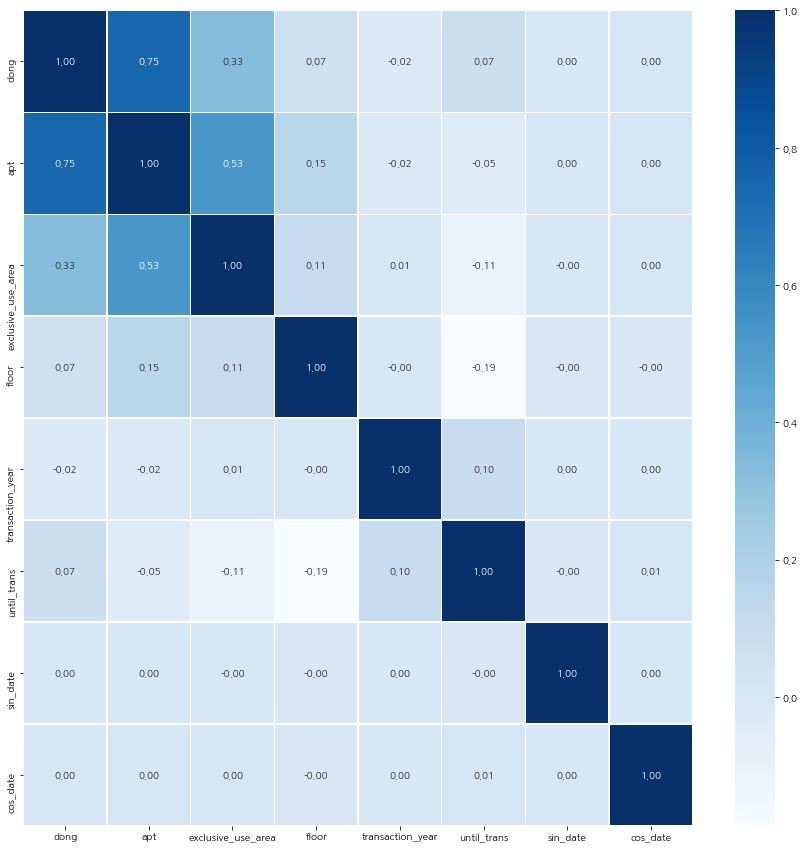

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 2.2 해석과 무관하게 일단 릿지 튜닝
mse를 비교해서 튜닝을 진행하세요.
릿지의 튜닝파라미터 알파는 0.00001, 0.0001, 0.001, 0.01, 0.1로 설정합니다.
알파가 클수록 강한 페널티입니다.
튜닝결과를 시각화해주세요.

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
X_train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,89176.597368,86280.203194,95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,89176.597368,86280.203194,108.55,11,0,5,-2.449294e-16,1.000000e+00
2,89176.597368,86280.203194,94.51,1,0,5,-2.449294e-16,1.000000e+00
3,36772.527903,36772.527903,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,36772.527903,36772.527903,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
416312,41897.713781,43050.956617,84.74,9,3,7,5.879543e-15,-1.000000e+00
416313,41897.713781,41799.433128,84.53,7,3,7,5.879543e-15,-1.000000e+00
416314,41897.713781,38541.570789,84.83,6,3,7,5.879543e-15,-1.000000e+00
416315,41897.713781,43050.956617,84.53,13,3,7,5.879543e-15,-1.000000e+00


In [23]:
#pred

In [25]:
y_val

2451       83000
2452      119000
2453       84500
2454       80000
2455      121000
           ...  
422159     47000
422160     46500
422161     40500
422162     51000
422163     49800
Name: price, Length: 109698, dtype: int64

In [26]:
model = Ridge(alpha=0.00001)
model.fit(X_train, y_train)
pred = model.predict(validation_x)
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mse)
print(rmse)

15377.977659081676


In [26]:
len(X_train)
len(y_train)

312466

In [27]:
X_train

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,89176.597368,86280.203194,95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,89176.597368,86280.203194,108.55,11,0,5,-2.449294e-16,1.000000e+00
2,89176.597368,86280.203194,94.51,1,0,5,-2.449294e-16,1.000000e+00
3,36772.527903,36772.527903,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,36772.527903,36772.527903,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
416312,41897.713781,43050.956617,84.74,9,3,7,5.879543e-15,-1.000000e+00
416313,41897.713781,41799.433128,84.53,7,3,7,5.879543e-15,-1.000000e+00
416314,41897.713781,38541.570789,84.83,6,3,7,5.879543e-15,-1.000000e+00
416315,41897.713781,43050.956617,84.53,13,3,7,5.879543e-15,-1.000000e+00


In [28]:
model2 = Ridge(alpha=0.001)
model2.fit(X_train, y_train)
pred2 = model2.predict(validation_x)
mse2 = mean_squared_error(y_val, pred2) 
rmse2 = np.sqrt(mse2)

In [29]:
model3 = Ridge(alpha=0.01)
model3.fit(X_train, y_train)
pred3 = model3.predict(validation_x)
mse3 = mean_squared_error(y_val, pred3) 
rmse3 = np.sqrt(mse3)

In [30]:
model4 = Ridge(alpha=0.1)
model4.fit(X_train, y_train)
pred4 = model4.predict(validation_x)
mse4 = mean_squared_error(y_val, pred4) 
rmse4 = np.sqrt(mse4)

In [31]:
alpha=[0.00001,0.001,0.01,0.1]
RMSE=[rmse,rmse2,rmse3,rmse4]
df=pd.DataFrame({'alpha':[0.00001,0.001,0.01,0.1],
                             'rmse':[rmse,rmse2,rmse3,rmse4]})
df


,alpha,rmse
0,0.00001,15377.977659
1,0.00100,15377.977661
2,0.01000,15377.977679
3,0.10000,15377.977855


## 2.3 튜닝결과 시각화¶

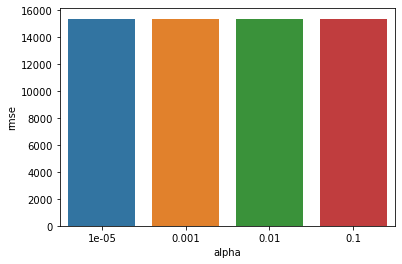

In [32]:
sns.barplot(x='alpha', y='rmse',data=df)

## 2.4 해석
튜닝 결과에 대한 플랏을 보고 해석을 해주세요.

튜닝이 잘되었나요?
튜닝이 안되었다면 그 이유는 무엇인가요?

https://stats.stackexchange.com/questions/81395/relationship-between-ridge-regression-and-pca-regression

수식이 쉽진 않을텐데 그냥 슬쩍 보세요...ㅎㅎㅎ
https://online.stat.psu.edu/stat508/lesson/5/5.1
penn state자료는 맨 아래부분만 보면 됩니다.

In [ ]:
잘 안되었습니다.

## 2.5 그냥 선형 모형으로!
그냥 linear regression을 튜닝을 위한 trainset에 적합시키고, validation set에 대한 rmse를 계산하세요.

linear regression은 다른 튜닝 파라미터를 필요로하지 않습니다.
ridge와의 validation rmse를 비교했을 때, 어떤 모형을 쓰는 것이 나을지 말해주세요

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lin = LinearRegression()
model=lin.fit(X_train,y_train)
pred = model.predict(validation_x)
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mse)
print(rmse)

15377.977659062974


In [ ]:
#릿지보다 미세하게 rnse가 낮으므로 선형 모델 쓰는게 나을 것 같다.

# 3. LightGBM
강력하면서도 빠른 부스팅 모형인 LGBM에 대해 다룰 예정입니다.

In [35]:
#! pip install lightgbm

## 3.1 LightGBM 이해
모형에 대해 아주 기본적인 이해는 필요하겠죠? LGBM의 특징/장점/문제점을 적어주세요.

20-01 데마팀 클린업 3주차 혹은 또 다른 데마팀 클린업을 보셔도 괜찮습니다.
구글링해도 잘 나옵니다

#### 특징
Light GBM은 Gradient Boosting 프레워크로 Tree 기반 학습 알고리즘입니다.Light GBM은 Tree가 수직적으로 확장

#### 장점
Light GBM은 큰 사이즈의 데이터를 다룰 수 있고 실행시킬 때 적은 메모리를 차지합니다
#### 문제점
 Light GBM은 overfitting (과적합)에 민감하고 작은 데이터에 대해서 과적합하기 쉽습니다

## 3.2 LGBM 튜닝
LGBM의 튜닝파라미터는 많습니다.
max_depth, learning_rate, lambda, min_child_samples 등 다양한데, 패키지에서는 learning rate만 튜닝하도록 하겠습니다.
[0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99] 이렇게 튜닝해주세요.
부스팅에서는 일단 learning rate과 iteration의 trade off를 적절하게 고려해줘서 학습속도를 맞춰준다음, 세부적인 튜닝을 하는게 일반적입니다.
더하고 싶으면 해서 더 좋은 성능을 내셔도 됩니다! 보통 enumerate를 통해 파라미터를 묶어줘서 진행합니다.

In [36]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor
# import itertools
learning_rate= [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]

In [37]:
lgbm= LGBMRegressor()
pred = lgbm.fit(X_train, y_train).predict(validation_x)
print(pred)


[ 95155.54967763 110321.28112919  81348.02617957 ...  34737.22069121
  48194.6073916   48579.09947432]


In [38]:
rmse_list=[]
learning_rate= [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.99]
for lr in learning_rate:
    lgbm= LGBMRegressor(learning_rate=lr)
    lgbm_pred = lgbm.fit(X_train, y_train).predict(validation_x)
    mse = mean_squared_error(y_val, lgbm_pred) 
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    
lgbm_df = pd.DataFrame({'learning rate':learning_rate, 'rmse':rmse_list})
lgbm_df.head() 

,learning rate,rmse
0,0.01,20688.401326
1,0.05,11209.651027
2,0.10,10340.974690
3,0.30,9725.425114
4,0.50,9431.094372


## 3.3 튜닝결과 시각화
learning_rate의 변화에 따른 rmse의 변화를 시각화해주세요!

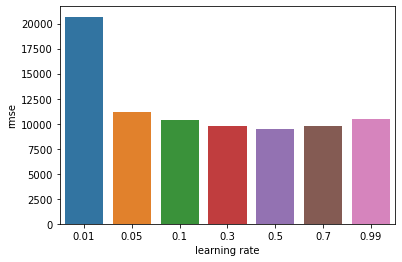

In [39]:
sns.barplot(x='learning rate', y='rmse',data=lgbm_df)

## 3.4 튜닝에 대하여 알아보자
우리가 한 튜닝방식은 그리드 서치(Grid Search)방법입니다. 다른 방법으로는 Random Search와 Bayesian Optimization 방법이 있습니다.

세 가지 방법에 대해서 간단히 설명하고, 장단점을 말해주세요.
요즘에는 Neural Process 기반의 Optimization이란 방법도 활발히 연구중이라던데...그냥 그렇다구요 ㅎㅎㅎ 원래 Bayesian Optimization이 Gaussian Process 기반인데, 이걸 뛰어넘는 성능이래요 암튼~

## 그리드서치
장점
단점
## 랜덤서치
장점
단점
## 베이지안 최적화
장점
단점

# 4. test set
## 4.1 test set 불러오기
test set을 불러오고
X와 y를 분리하세요.

In [27]:
test=test[["dong","apt","exclusive_use_area","floor","transaction_year","until_trans","sin_date","cos_date","price"]]

In [32]:
x_train.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,0,8,1.000000e+00,3.061617e-16


In [33]:
x_test=test.iloc[:,0:8]
x_test.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),70.80,1,5,10,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),94.51,8,5,10,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),160.85,11,5,10,-2.449294e-16,1.000000e+00
3,사직동,광화문풍림스페이스본(9-0),94.51,6,5,10,1.000000e+00,3.061617e-16
4,사직동,광화문풍림스페이스본(9-0),136.40,3,5,10,1.000000e+00,3.061617e-16


In [34]:
y_test=test['price']
#y_test

In [38]:
y_train

0          70000
1         100500
2          65800
3          30500
4          30500
           ...  
416312     45500
416313     44000
416314     47500
416315     45700
416316     44000
Name: price, Length: 312466, dtype: int64

## 4.2 캣부스트 인코딩
전체 train set에 대해 캣부스트 인코딩을 시행해주세요.
인자에는 train_x/train_y/test_x가 들어갈겁니다.


In [45]:
cbe_encoder = CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(x_train,y_train)
test_x= cbe_encoder.transform(x_test)
#train_y=cbe_encoder.transform(y_train)
train_x=cbe_encoder.transform(x_train)

In [46]:
test_x

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,91827.227742,89369.051084,70.80,1,5,10,-1.000000e+00,-1.836970e-16
1,91827.227742,89369.051084,94.51,8,5,10,-2.449294e-16,1.000000e+00
2,91827.227742,89369.051084,160.85,11,5,10,-2.449294e-16,1.000000e+00
3,91827.227742,89369.051084,94.51,6,5,10,1.000000e+00,3.061617e-16
4,91827.227742,89369.051084,136.40,3,5,10,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
91359,42897.089485,48238.989201,59.72,9,5,7,-1.470814e-15,-1.000000e+00
91360,42897.089485,41180.818678,59.87,12,5,9,-1.000000e+00,-3.919489e-15
91361,42897.089485,41180.818678,84.74,3,5,9,-1.000000e+00,-3.919489e-15
91362,42897.089485,41737.824622,84.74,9,5,9,-1.000000e+00,-3.919489e-15


## 4.3 최적의 파라미터 적합
2와 3의 결과에서 최적의 파라미터(모델)을 전체 trainset에 대해 적합하세요.


In [48]:
model = Ridge(alpha=0.00001)
model.fit(train_x, y_train)
pred = model.predict(test_x)
mse = mean_squared_error(y_test, pred) 
rmse = np.sqrt(mse)
print(rmse)

17721.880605179114


In [49]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor
lgbm= LGBMRegressor(learning_rate=0.5)
lgbm_pred = lgbm_pred = lgbm.fit(train_x, y_train).predict(test_x)
mse2 = mean_squared_error(y_test, lgbm_pred) 
rmse2 = np.sqrt(mse2)
print(rmse2)

11909.118492076514


## 4.4 test set에 대해 평가
두 모델을 test set에 대해 평가해서 비교하세요.

In [50]:
#lightbgm이 예측값과 실제값의 rmse가 릿지보다 더 작기 때문에 lightbgm의 성능이 더 낫다.
